<a href="https://colab.research.google.com/github/evany24/Predictions-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Prediction of Product Sales

- Evan Yeslow

## Project Overview

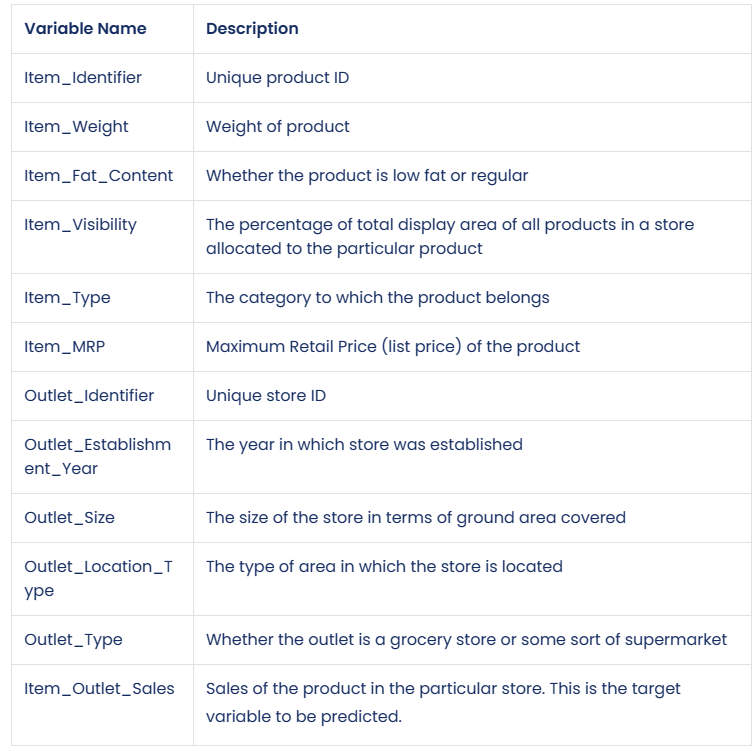

## Load and Inspect Data

### **Loading Data**

In [1]:
#import pandas
import pandas as pd
filename = '/content/drive/MyDrive/sales_predictions.xlsx'
df = pd.read_excel(filename)
#MissingNo
import missingno as msno
#import numpy
import numpy as np
#seaborn
import seaborn as sns
#matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

### **Inspect Data**

#### **info()**

In [2]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **head()**

In [3]:
## Display the first (5) rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **dtypes()**

In [4]:
## Display the column names and datatypes for each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### **shape()**

In [5]:
## Display the number of rows and columns for the dataframe
df.shape

(8523, 12)

#### **describe()**

In [6]:
## Display the descriptive statistics for the numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* We can see that Item_Fat_Content has too many descriptors. Outlet_Size descriptors can be updated. There are misssing values in the Outlet_Size and Outlet_Weight column

## Clean Data

### **Remove unnecessary columns**

#### **Inspect Column Datatypes for Errors**

* Check the data types of the dataframe using df.dtypes or df.info()

In [7]:
## Display column names and datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### **Inspect Column Names for Errors**

In [8]:
## Display column names
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

* No errors seen

#### **Inspect Values for Errors**

##### **Numeric Columns**

In [9]:
# View the numberic statistics for columns contain numberical values
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### **Consistency in Categorical Columns**

In [10]:
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [11]:
## Loop through the index of object_data_types 
for column in object_data_types.index:
  # Display the unique values for the column
  print(df[column].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


* We can see that Outlet_Size has missing values and that the category High can be changed to Large to act as a more accurate description
* We can also see that Item_Fat_Content categories can be consolidated into Low Fat and Regular


### **Remove unnecassary rows**

#### Duplicates

In [12]:
# check for duplicate values
df.duplicated().sum()

0

* There are no duplicates

### **Missing Values**

In [13]:
# Total missing values
df.isna().sum().sum()

3873

In [14]:
# Missing values in each column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
## Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


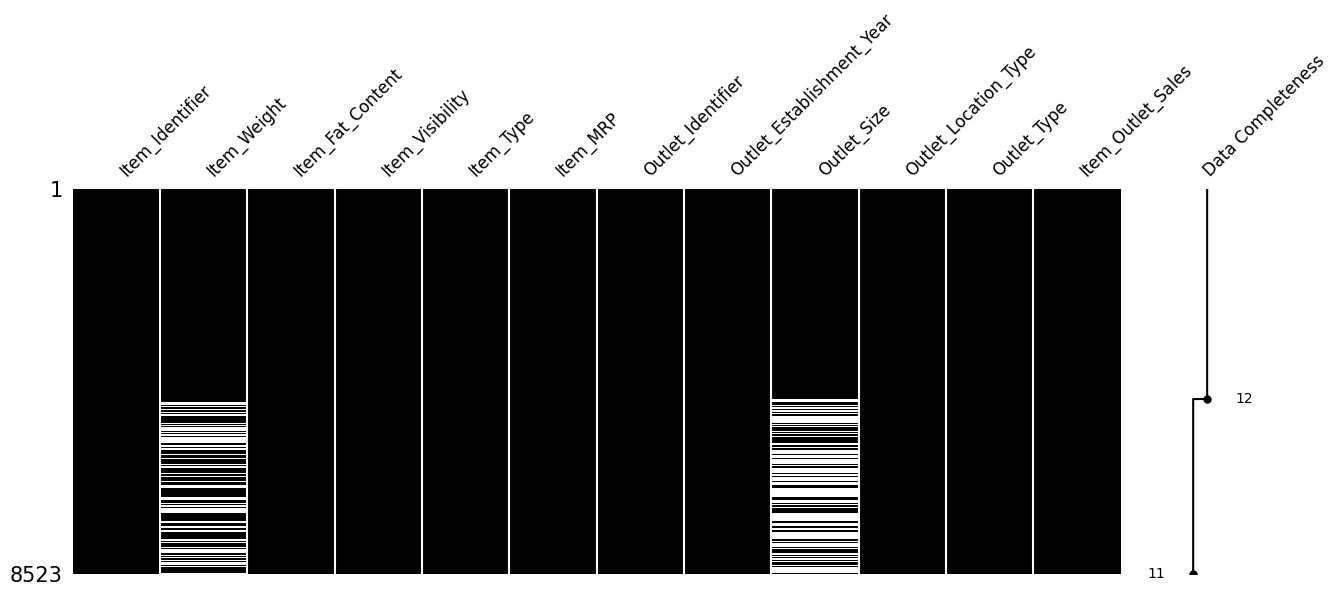

In [16]:
# Display missing values by column
msno.matrix(df, figsize=(15,5), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

#### **Item_Weight**



* We will use the average of item weights to fill in the missing Item_Weight values<br>
* The average value is seldom going to be the exact correct value, but it will be the value that is likely to be closest to the correct value, given the available information. 


In [17]:
#average of Item_Weights
iw_avg = df['Item_Weight'].mean()

In [18]:
#fill missing Item_Weights with average
df['Item_Weight'].fillna(iw_avg, inplace=True)

#### **Outlet_Size**

* Almost 29 percent of the values for Outlet_Size are missing, we don't want to miss the chance to analyze certain patterns or make certain predictions so we will create a new category as 'Unknown' to fill those values

In [19]:
# fill missing values in Outlet_Size with 'Unknown'
df['Outlet_Size'].fillna(value = 'Unknown', inplace = True)

In [20]:
# values for data in the Outlet_Size column
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

* The missing values have been changed to 'Unknown'

In [21]:
# Total missing values
df.isna().sum().sum()

0

In [22]:
# Missing values in each column
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

* There are no more missing values

### **Get rid of excess categories**

In [23]:
# replace LF and low fat to Low Fat and reg to Regular
df.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': "Regular"}, inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* We now have 'Low Fat' and 'Regular' as our values for the Item_Fat_Content column

In [24]:
# change the descriptor for Outlet_Size from High to Large
df.replace({'High': 'Large'}, inplace=True)

In [25]:
# Display the unique values from the column Outlet_Size
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

* We now have 'Large' instead of 'High' for our category in the Outlet_Size column

## Exploratory Data Analysis

### Numerical Columns

#### Item Weight

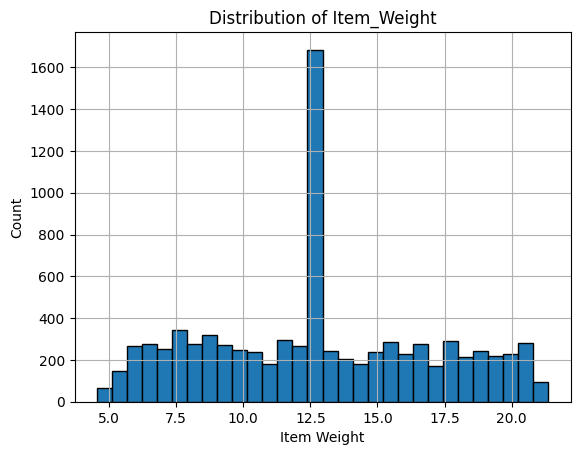

In [26]:
# Histogram of Item Weight
ax = df['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item_Weight')
ax.set_xlabel('Item Weight')
ax.set_ylabel('Count');

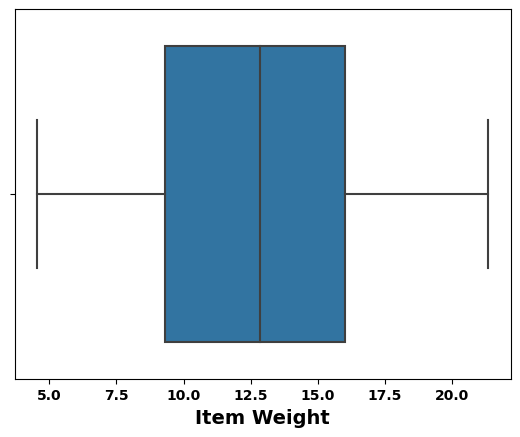

In [27]:
# seaborn box plot for Item Weight
ax = sns.boxplot(data = df,
                 x = 'Item_Weight')
ax.set_xlabel('Item Weight', fontsize=14, weight='bold')
plt.xticks(fontsize=10, weight='bold');

#### Item Visibility

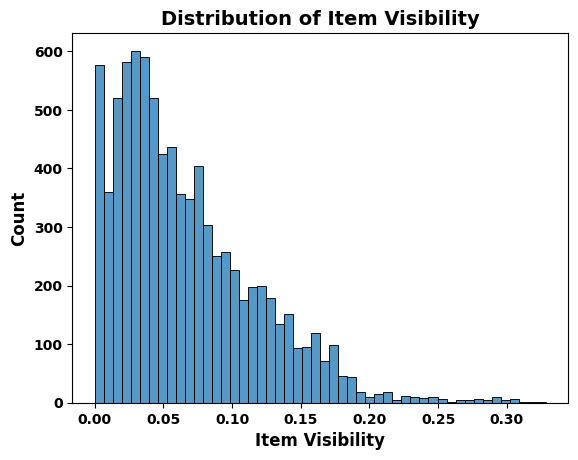

In [28]:
#Histogram of Item Visibility
ax = sns.histplot(data=df,
                  x='Item_Visibility')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item Visibility', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Add a title
ax.set_title('Distribution of Item Visibility', fontsize=14, weight='bold');

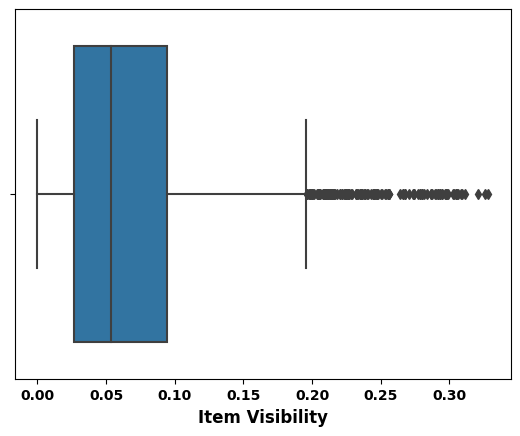

In [29]:
# seaborn box plot for Item Visibility
ax = sns.boxplot(data = df,
                 x = 'Item_Visibility')
ax.set_xlabel('Item Visibility', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

#### Item MRP

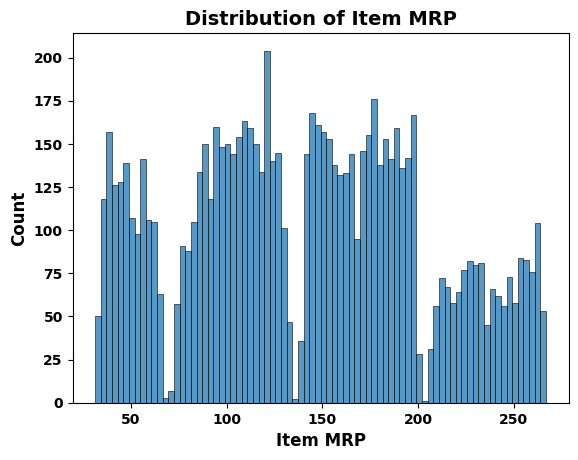

In [30]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='Item_MRP',
                  bins= 80)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item MRP', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Add a title
ax.set_title('Distribution of Item MRP', fontsize=14, weight='bold');

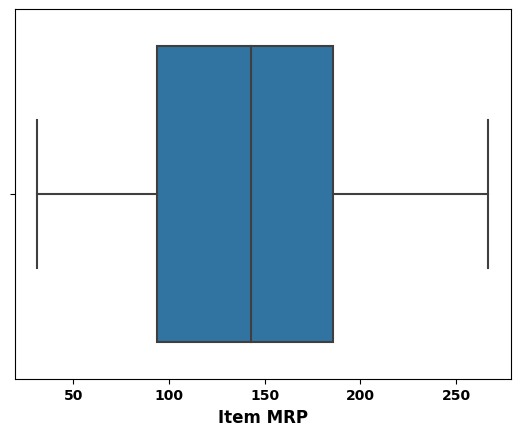

In [31]:
# seaborn boxplot for Item MRP
ax = sns.boxplot(data = df,
                 x = 'Item_MRP')
ax.set_xlabel('Item MRP', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

#### Item Outlet Sales

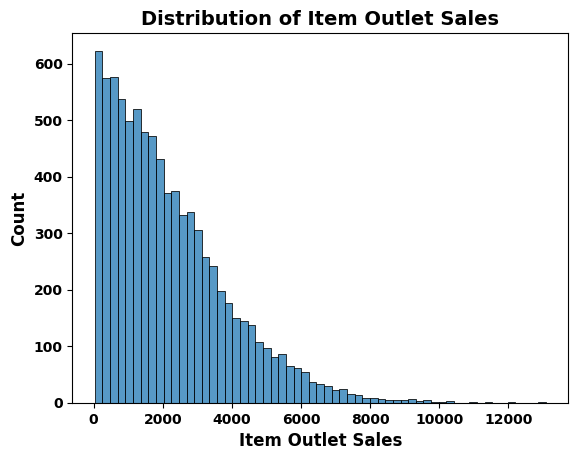

In [32]:
#histogram of Outlet Sales
ax = sns.histplot(data=df,
                  x='Item_Outlet_Sales')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item Outlet Sales', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Add a title
ax.set_title('Distribution of Item Outlet Sales', fontsize=14, weight='bold');

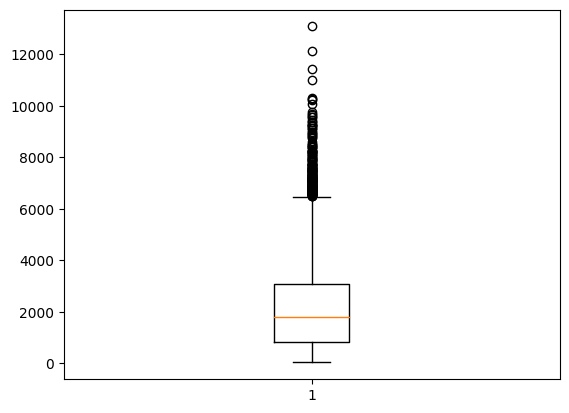

In [33]:
# matplotlib boxplot of Item Sales
data = df['Item_Outlet_Sales']
fig, ax = plt.subplots()
ax.boxplot([data]);

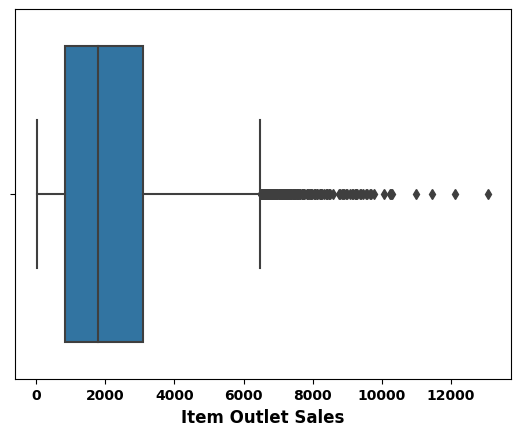

In [34]:
# seaborn boxplot for Item Outlet Sales
ax = sns.boxplot(data = df,
                 x = 'Item_Outlet_Sales')
ax.set_xlabel('Item Outlet Sales', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

### Categorical Columns

#### Item Fat Content

In [35]:
#value counts for Item Fat Content
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
#Display the descriptive statistics for the column
df['Item_Fat_Content'].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

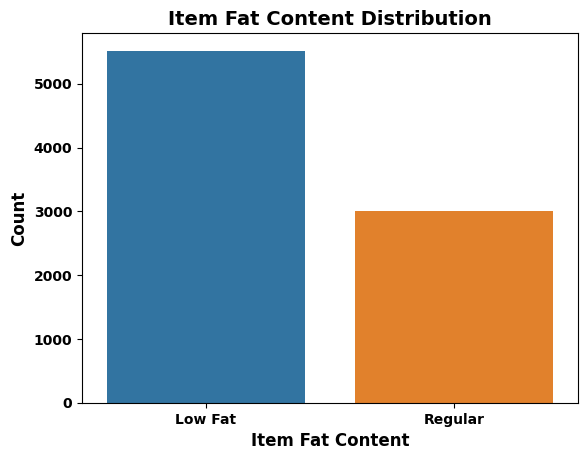

In [37]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df, 
                   x='Item_Fat_Content')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Item Fat Content', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Item Fat Content Distribution', fontsize = 14, weight = 'bold');                  

#### Item Type

In [38]:
# value counts for Item Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [39]:
# descriptive statistics for Item Type
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

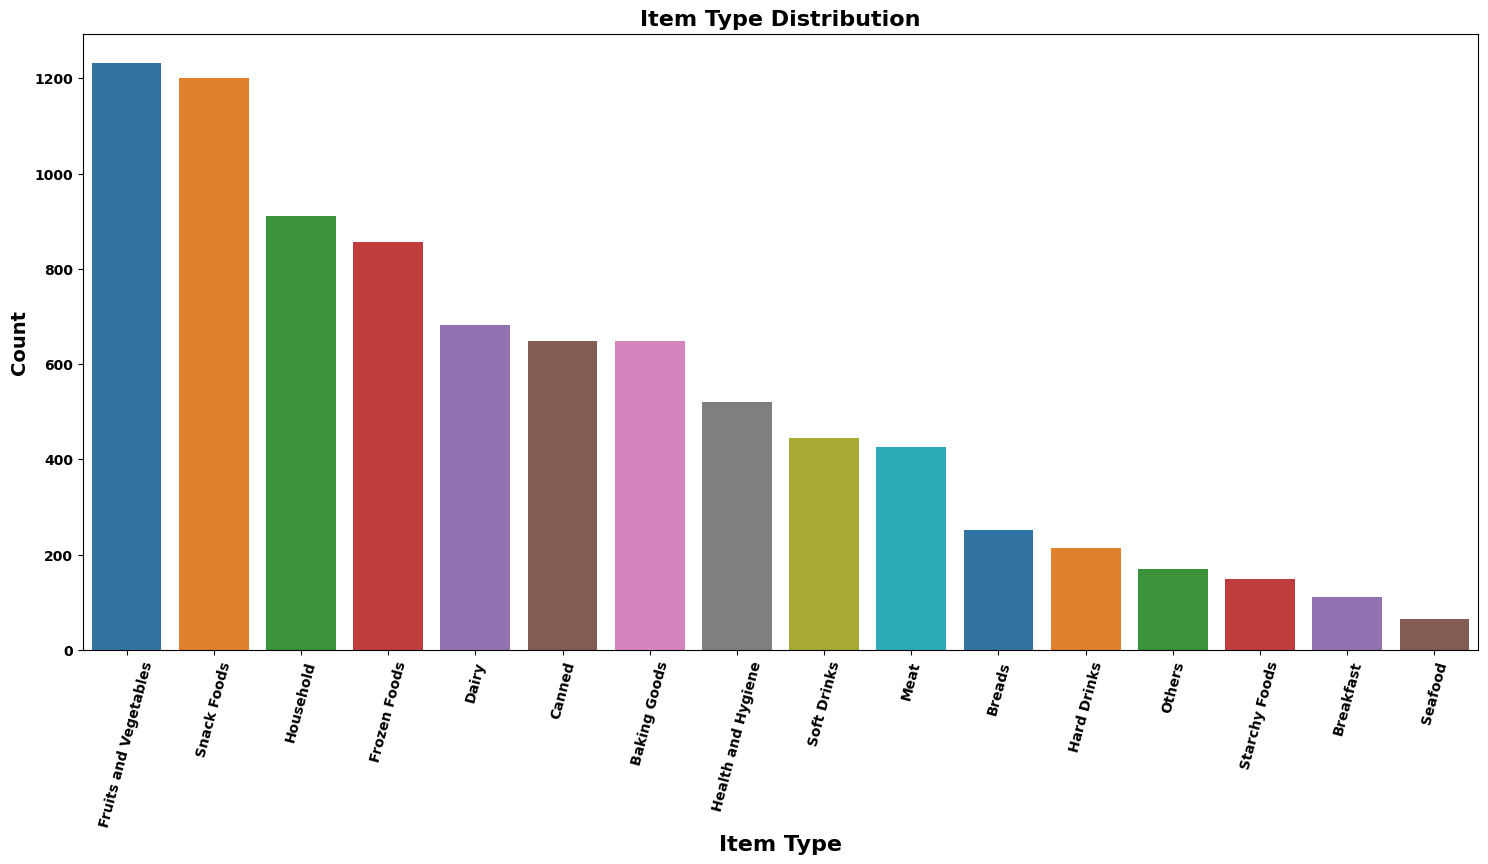

In [40]:
# label order
label_order = df['Item_Type'].value_counts().index
plt.figure(figsize= (18, 8))
colors = sns.color_palette("tab10")
# make MatplotLib ax object using seaborn.countplot
ax = sns.countplot(data=df,
                   x='Item_Type', 
                   order = label_order,
                   palette = colors)
# rotate labels
plt.xticks(fontsize=10, weight='bold', rotation = 75)
plt.yticks(fontsize=10, weight='bold')
# set x and y labels
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlabel('Item Type', fontsize=16, weight='bold')
## Set the Title
ax.set_title('Item Type Distribution', fontsize=16, weight='bold');

#### Outlet Identifier

In [41]:
# value counts for Outlet Identifier
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [42]:
# descriptive statistics for Outlet Identifier
df['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

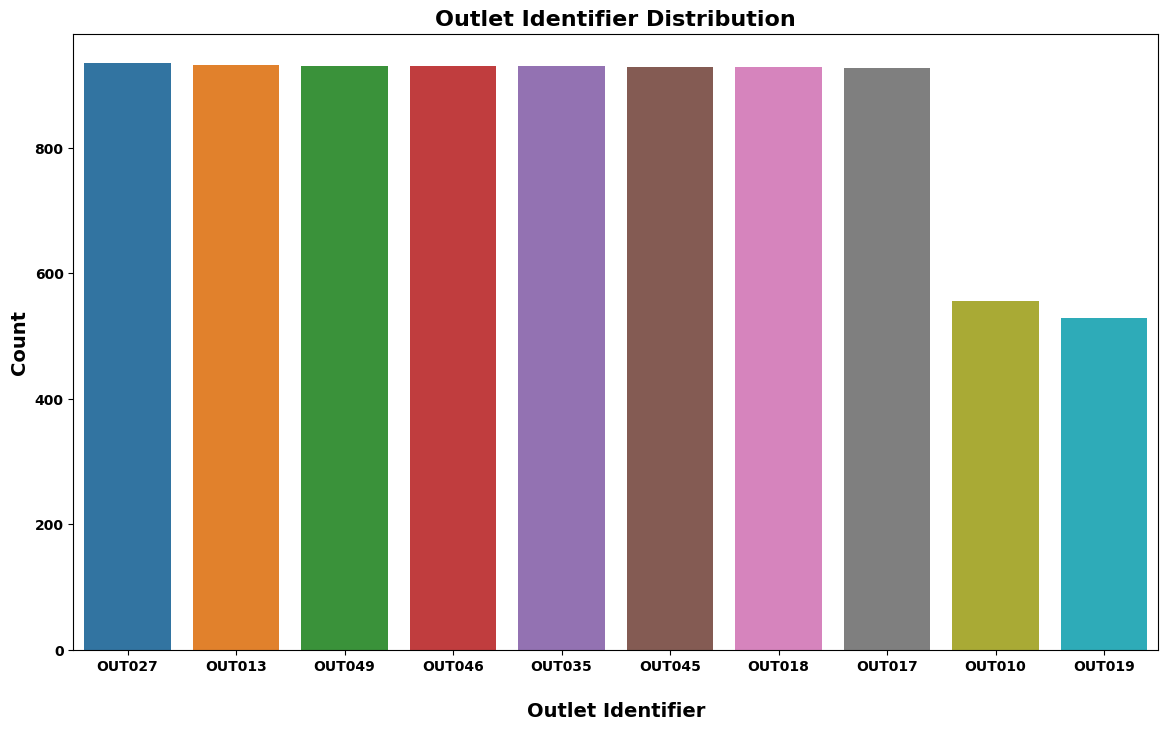

In [43]:
# label order
label_order = df['Outlet_Identifier'].value_counts().index
plt.figure(figsize= (14, 8))
colors = sns.color_palette("tab10")
# make MatplotLib ax object using seaborn.countplot
ax = sns.countplot(data=df,
                   x='Outlet_Identifier', 
                   order = label_order,
                   palette = colors)
# set tick font and size
plt.xticks(fontsize=10, weight='bold', ha="center")
plt.yticks(fontsize=10, weight='bold')
# set x and y labels
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlabel('Outlet Identifier', fontsize=14, weight='bold', labelpad = 20)
## Set the Title
ax.set_title('Outlet Identifier Distribution', fontsize=16, weight='bold');

#### Outlet Size

In [44]:
# value counts for Outlet Size
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

In [45]:
# descriptive statistics for the Outlet Size
df['Outlet_Size'].describe()

count       8523
unique         4
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

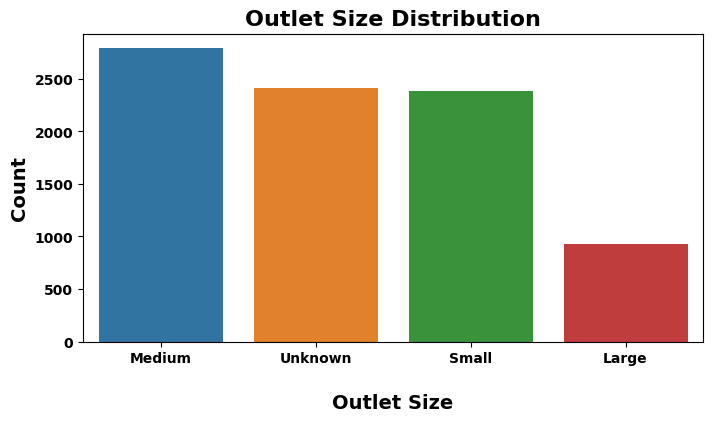

In [46]:
# label order
label_order = df['Outlet_Size'].value_counts().index
colors = sns.color_palette("tab10")
plt.figure(figsize= (8, 4))
# make MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Outlet_Size', 
                   order = label_order,
                   palette = colors)
# set ticks font and size
plt.xticks(fontsize=10, weight='bold', ha="center")
plt.yticks(fontsize=10, weight='bold')
# set x and y labels
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlabel('Outlet Size', fontsize=14, weight='bold', labelpad = 20)
## Set the Title
ax.set_title('Outlet Size Distribution', fontsize=16, weight='bold');

#### Outlet Location Type

In [47]:
# value counts for Outlet Location Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [48]:
# descriptive statistics for Outlet Location Type
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

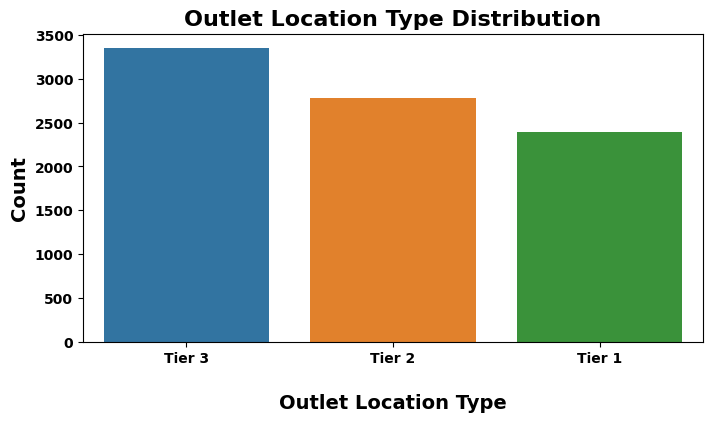

In [49]:
# label order
label_order = df['Outlet_Location_Type'].value_counts().index
colors = sns.color_palette("tab10")
plt.figure(figsize= (8, 4))
# make MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Outlet_Location_Type', 
                   order = label_order,
                   palette = colors)
# set x and y ticks
plt.xticks(fontsize=10, weight='bold', ha="center")
plt.yticks(fontsize=10, weight='bold')
# set x and y labels
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlabel('Outlet Location Type', fontsize=14, weight='bold', labelpad = 20)
## Set the Title
ax.set_title('Outlet Location Type Distribution', fontsize=16, weight='bold');

#### Outlet Type

In [50]:
# value counts for Outlet Type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [51]:
# description of statistics for Outlet Type
df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

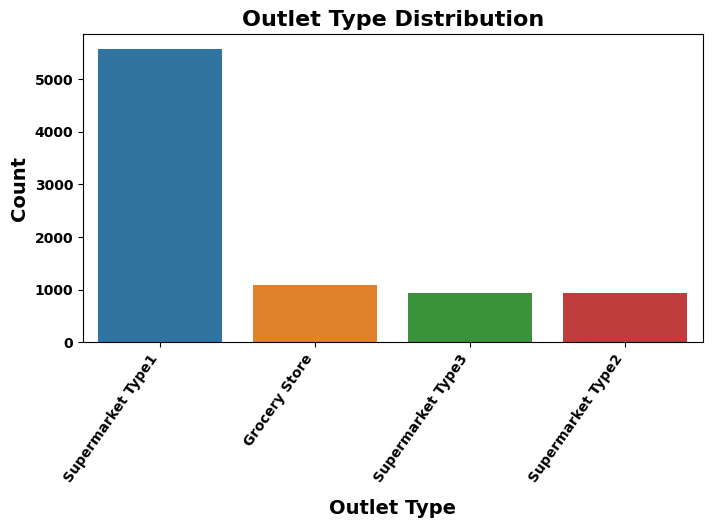

In [52]:
# label order
label_order = df['Outlet_Type'].value_counts().index
colors = sns.color_palette("tab10")
plt.figure(figsize= (8, 4))
# make MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Outlet_Type', 
                   order = label_order,
                   palette = colors)
# set x and y ticks
plt.xticks(fontsize=10, weight='bold', ha="right", rotation = 55)
plt.yticks(fontsize=10, weight='bold')
# set x and y labels, rotate them
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlabel('Outlet Type', fontsize=14, weight='bold', labelpad = 10)
## Set the Title
ax.set_title('Outlet Type Distribution', fontsize=16, weight='bold');

###Correlation

#### Item Outlet Sales by Outlet Size

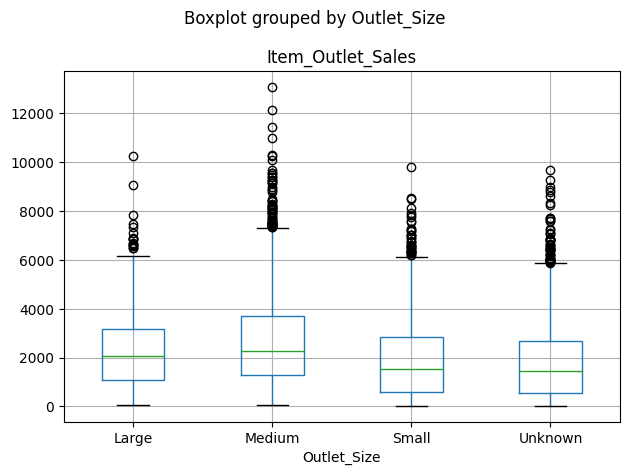

In [53]:
#boxplot for Item Outlet Sales by Outlet Size
ax = df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Size')
plt.tight_layout();

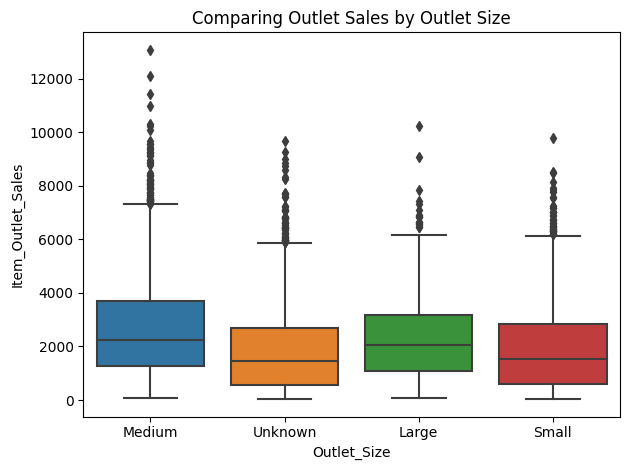

In [54]:
#seaborn boxplot for outlet sales by outlet size
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet Sales by Outlet Size")
plt.tight_layout();

* Outlet Sales are highest in the medium size stores. Large has the next highest. The small and unknown size stores have similar outlet sales.

#### Item Outlet Sales by Outlet Type

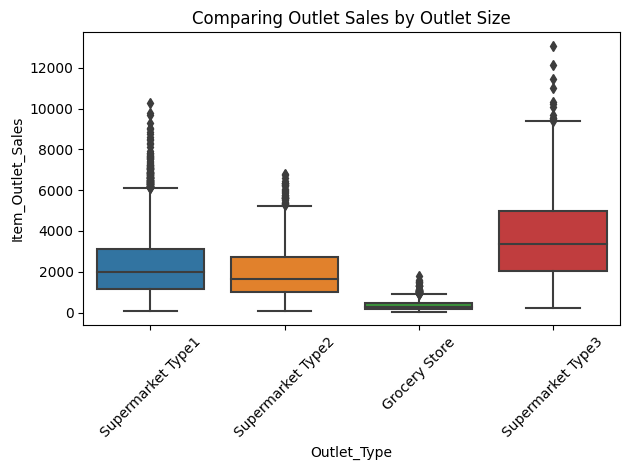

In [55]:
#seaborn boxplot for Item Outlet Sales by Outlet Type
ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet Sales by Outlet Size")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout();

* It appears that Supermarket Type 3 has the largest Item Outlet Sales followed by Type 1 and Type 2. Grocery stores have the lowest Item Outlet Sales.

#### Item Outlet Sales by Outlet Location Type

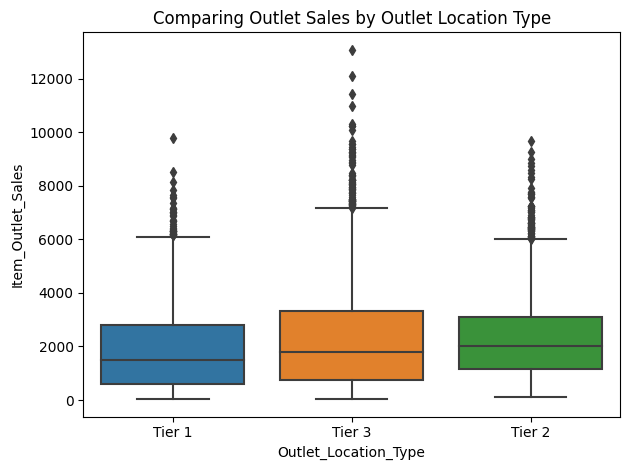

In [56]:
#seaborn boxplot for Outlet Sales by Outlet Location Type
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet Sales by Outlet Location Type")
plt.tight_layout();

* Item Outlet Sales are highest in Tier 3 type stores followed by Tier 2 and then tier 1.

#### Heatmap

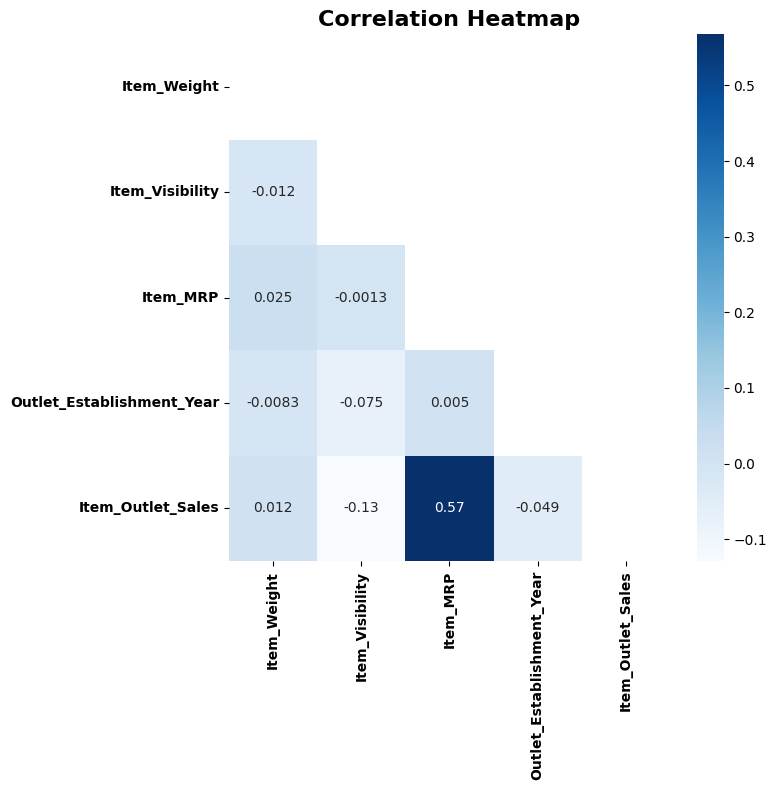

In [57]:
# seaborn heatmap
plt.figure(figsize = (8, 8))
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap= 'Blues', annot = True, mask = mask);

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold')

plt.tight_layout()
plt.show;

* There is a moderate postiive correlation between Item Outlet Sales and Item MRP. It also appears there is a negative correlation when between Item Visibility and Item Outlet Sales

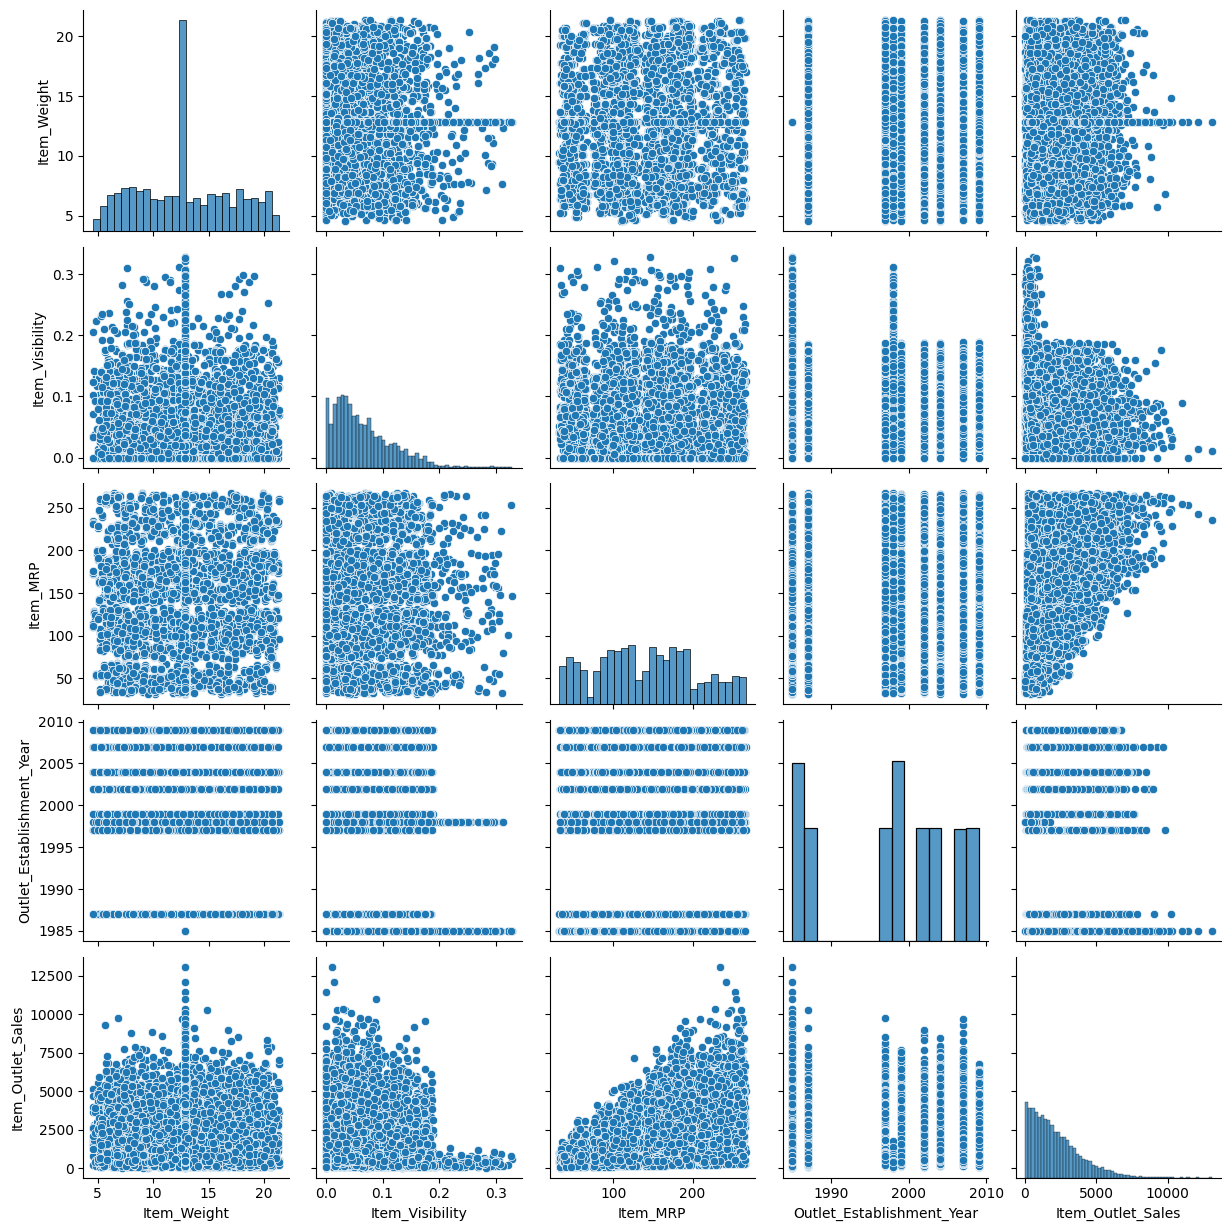

In [58]:
#seaborn pairplot
sns.pairplot(df);

## Explanatory Data Analysis

### How does Item MRP affect Item Outlet Sales

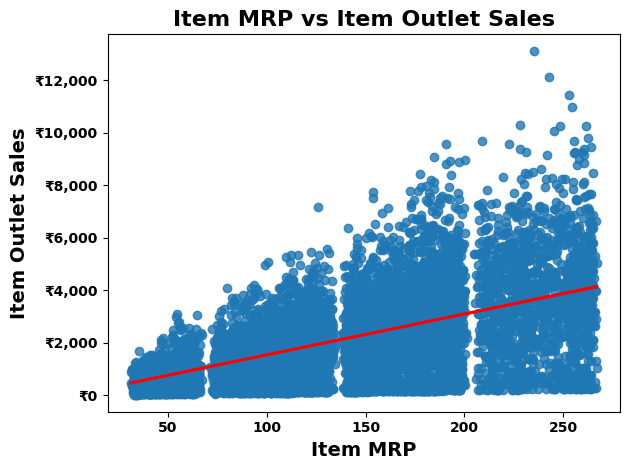

In [59]:
# make MatplotLib ax object using sns.regplot()
ax = sns.regplot(x ='Item_MRP', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})
# Set the Title
ax.set_title('Item MRP vs Item Outlet Sales', fontsize = 16, weight = 'bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item MRP', fontsize = 14, weight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 14, weight = 'bold')
# string formatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show();

* There is a postive correlation between Item MRP and Item Outlet Sales which means as Item MRP increases so do Item Outlet Sales.

### Does Item Visibility affect Item Outlet Sales?

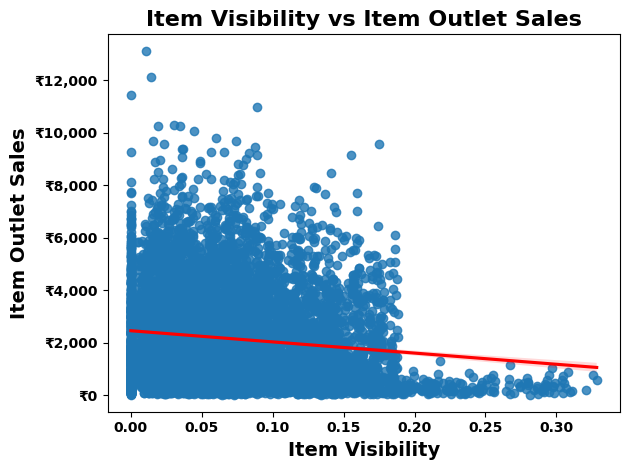

In [60]:
# make MatplotLib ax object using sns.regplot()
ax = sns.regplot(x ='Item_Visibility', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})
# Set the Title
ax.set_title('Item Visibility vs Item Outlet Sales', fontsize = 16, weight = 'bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item Visibility', fontsize = 14, weight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 14, weight = 'bold')
# string formatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show();

* There is a slightly negative correlation between Item Visibilty and Item Outlet Sales. This means that as Item Visibility increases the Item Outlet Sales decrease.

### How does Item Type affect Item Outlet Sales?

In [61]:
# eda
eda_df = df.copy()
top_selling_item_types_df = eda_df.groupby('Item_Type')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False)
top_selling_item_types_df['sum'] = round(top_selling_item_types_df['sum'],3)
top_selling_item_types_df['percentage'] = (top_selling_item_types_df['sum'] / top_selling_item_types_df['sum'].sum()) * 100
print(top_selling_item_types_df)

                               sum  percentage
Item_Type                                     
Fruits and Vegetables  2820059.817   15.168849
Snack Foods            2732786.087   14.699412
Household              2055493.713   11.056317
Frozen Foods           1825734.789    9.820464
Dairy                  1522594.051    8.189897
Canned                 1444151.493    7.767962
Baking Goods           1265525.342    6.807148
Health and Hygiene     1045200.138    5.622038
Meat                    917565.612    4.935503
Soft Drinks             892897.722    4.802817
Breads                  553237.189    2.975813
Hard Drinks             457793.427    2.462430
Starchy Foods           351401.250    1.890156
Others                  325517.610    1.750930
Breakfast               232298.952    1.249515
Seafood                 148868.219    0.800749


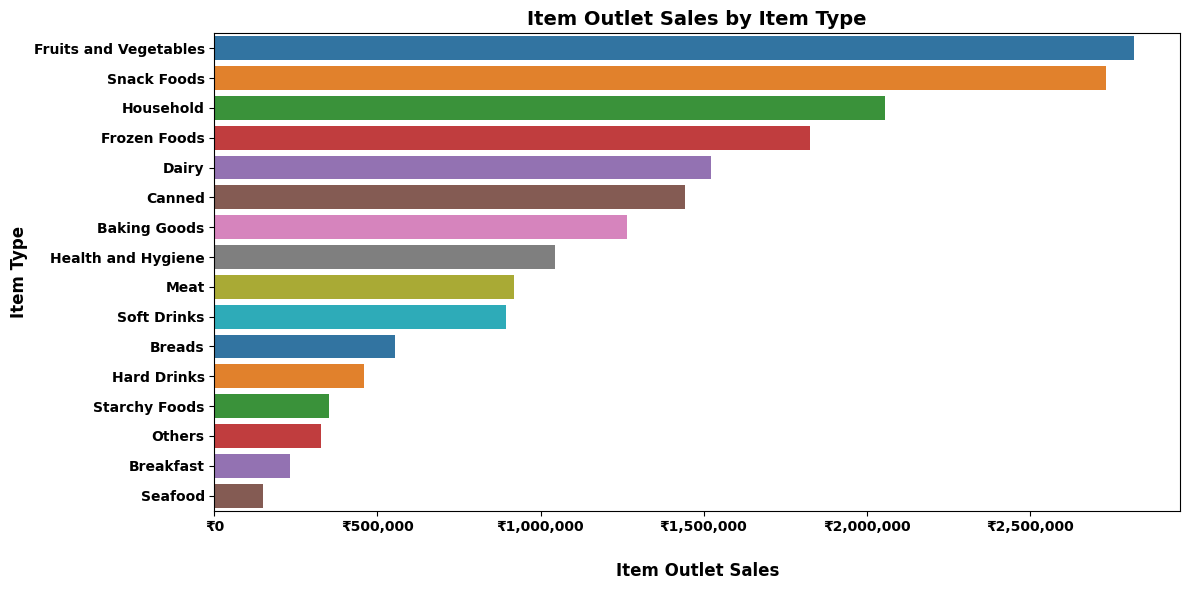

In [62]:
# get sum and sort value counts for dataframe with grouped Item Type and Item Outlet Sales
df_sorted = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
# set palette
colors = sns.color_palette("tab10", n_colors=len(df_sorted))
plt.figure(figsize=(12, 6))
# make seaborn barplot
ax = sns.barplot(data=df_sorted,
                 x='Item_Outlet_Sales',
                 y='Item_Type', 
                 order=df_sorted['Item_Type'], 
                 palette=colors)
# set labels
ax.set_ylabel('Item Type', fontsize=12, weight='bold')
ax.set_xlabel('Item Outlet Sales', fontsize=12, weight='bold', labelpad =  20)
# set title
ax.set_title('Item Outlet Sales by Item Type', fontsize=14, weight='bold')
# set ticks
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# string formatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout();  

* Fruits and vegetables have the highest Item Outlet Sales followed by Snack Foods. Breakfast and Seafood have the lowest Item Outlet Sales.

### How does Outlet Size affect Item Outlet Sales

In [63]:
# eda
eda_df = df.copy()
top_selling_item_types_df = eda_df.groupby('Outlet_Size')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False)
top_selling_item_types_df['sum'] = round(top_selling_item_types_df['sum'],3)
top_selling_item_types_df['percentage'] = (top_selling_item_types_df['sum'] / top_selling_item_types_df['sum'].sum()) * 100
print(top_selling_item_types_df)

                     sum  percentage
Outlet_Size                         
Medium       7489718.692   40.286527
Small        4566212.197   24.561247
Unknown      4392530.943   23.627031
Large        2142663.578   11.525196


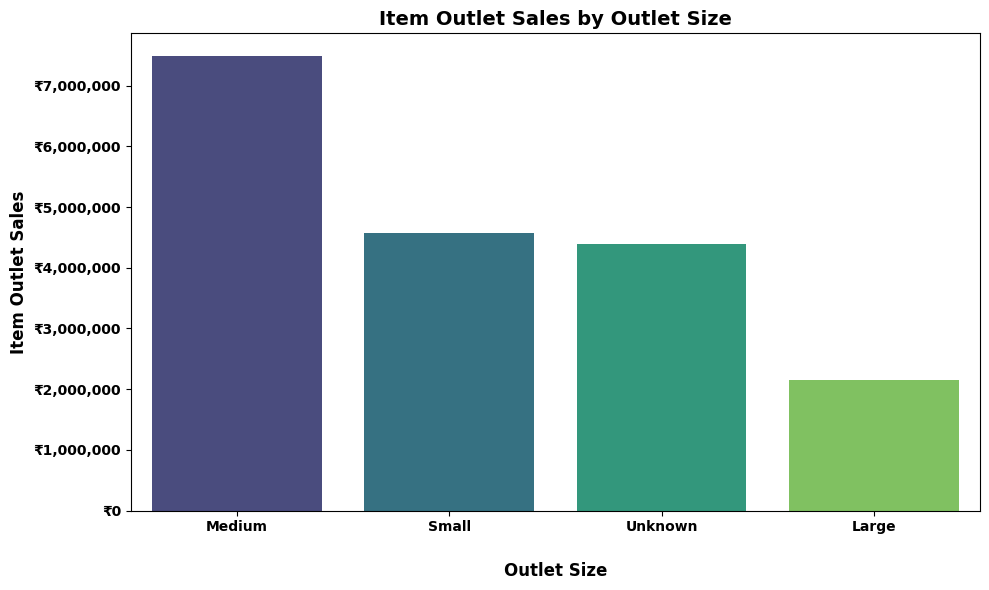

In [64]:
# get sum and sort value counts for dataframe with grouped Outlet Size and Item Outlet Sales
df_sorted = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
# set palette
colors = sns.color_palette("viridis", n_colors=len(df_sorted))
plt.figure(figsize=(10, 6))
# make seaborn barplot
ax = sns.barplot(data=df_sorted,
                 x='Outlet_Size',
                 y='Item_Outlet_Sales', 
                 order=df_sorted['Outlet_Size'], 
                 palette=colors)
# set labels
ax.set_ylabel('Item Outlet Sales', fontsize=12, weight='bold')
ax.set_xlabel('Outlet Size', fontsize=12, weight='bold', labelpad =  20)
# set title
ax.set_title('Item Outlet Sales by Outlet Size', fontsize=14, weight='bold')
# set ticks
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# string formatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.tight_layout();  

* Medium Size outlets have the highest Item Outlet Sales. Large Outlets have the least Item Outlet Sales.

### What are the Outlet Item Sales by Outlet Type

In [65]:
# eda
eda_df = df.copy()
top_selling_item_types_df = eda_df.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False)
top_selling_item_types_df['sum'] = round(top_selling_item_types_df['sum'],3)
top_selling_item_types_df['percentage'] = (top_selling_item_types_df['sum'] / top_selling_item_types_df['sum'].sum()) * 100
print(top_selling_item_types_df)

                            sum  percentage
Outlet_Type                                
Supermarket Type1  1.291734e+07   69.481228
Supermarket Type3  3.453926e+06   18.578359
Supermarket Type2  1.851823e+06    9.960789
Grocery Store      3.680343e+05    1.979623


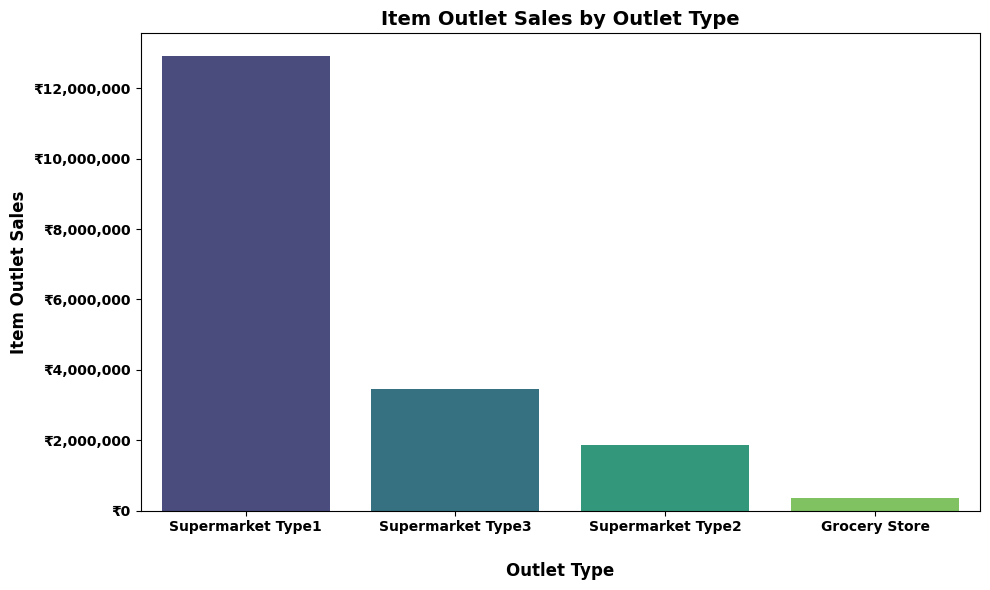

In [66]:
# get sum and sort value counts for dataframe with grouped Outlet Size and Item Outlet Sales
df_sorted = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
# set palette
colors = sns.color_palette("viridis", n_colors=len(df_sorted))
plt.figure(figsize=(10, 6))
# make seaborn barplot
ax = sns.barplot(data=df_sorted,
                 x='Outlet_Type',
                 y='Item_Outlet_Sales', 
                 order=df_sorted['Outlet_Type'], 
                 palette=colors)
# set labels
ax.set_ylabel('Item Outlet Sales', fontsize=12, weight='bold')
ax.set_xlabel('Outlet Type', fontsize=12, weight='bold', labelpad =  20)
# set title
ax.set_title('Item Outlet Sales by Outlet Type', fontsize=14, weight='bold')
# set ticks
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# string formatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.tight_layout();  

* Supermarkets Type 1 have the highest Outlet Item Sales followed by Type 3, Type 2 and finally Grocery Stores which have the lowest Item Outlet Sales.

### How does Item Fat Content affect Item Outlet Sales

In [67]:
# eda
eda_df = df.copy()
top_selling_item_types_df = eda_df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False)
top_selling_item_types_df['sum'] = round(top_selling_item_types_df['sum'],3)
top_selling_item_types_df['percentage'] = (top_selling_item_types_df['sum'] / top_selling_item_types_df['sum'].sum()) * 100
print(top_selling_item_types_df)

                           sum  percentage
Item_Fat_Content                          
Low Fat           1.190409e+07   64.031059
Regular           6.687031e+06   35.968941


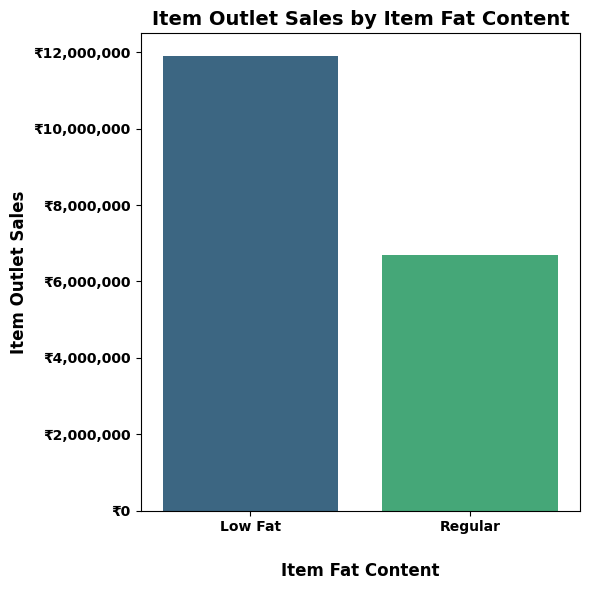

In [68]:
# get sum and sort value counts for dataframe with grouped Outlet Size and Item Outlet Sales
df_sorted = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
# set palette
colors = sns.color_palette("viridis", n_colors=len(df_sorted))
plt.figure(figsize=(6, 6))
# make seaborn barplot
ax = sns.barplot(data=df_sorted,
                 x='Item_Fat_Content',
                 y='Item_Outlet_Sales',
                 palette=colors)
# set labels
ax.set_ylabel('Item Outlet Sales', fontsize=12, weight='bold')
ax.set_xlabel('Item Fat Content', fontsize=12, weight='bold', labelpad =  20)
# set title
ax.set_title('Item Outlet Sales by Item Fat Content', fontsize=14, weight='bold')
# set ticks
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# string formatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.tight_layout();  

* Low Fat items have almost double the Item Outlet Sales than Regular Fat Items

## Preprocessing for Machine Learning

In [69]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [70]:
# import data
path = '/content/drive/MyDrive/sales_predictions_2023.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Identify features as numerical, ordinal or nominal

- Numerical columns include Item_Weight, Item_Visibility and Item_MRP
- There are no ordinal features
- Nominal feature include Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type
- Outlet_Establishment_Year is a date so we will make that categorical



**Objects**

In [72]:
# use loop to look at unique object types and number of them
object_type = df.dtypes[df.dtypes == 'object']
for i in object_type.index:
  print(i, '---')
  print(df[i].unique())
  print(df[i].nunique())
  print("")

Item_Identifier ---
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
1559

Item_Fat_Content ---
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
5

Item_Type ---
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
16

Outlet_Identifier ---
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
10

Outlet_Size ---
['Medium' nan 'High' 'Small']
3

Outlet_Location_Type ---
['Tier 1' 'Tier 3' 'Tier 2']
3

Outlet_Type ---
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
4



* We will be dropping the Item_Identifier column later as there are too many unique values

In [73]:
# change Outlet_Establishment_Year to object
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype("object")

## Fix inconsistencies and drop duplicates in categorical data

In [74]:
#sum of all duplicates
df.duplicated().sum()

0

In [75]:
# Replace LF to Low Fat, low fat to Low Fat, reg to Regular in Item_Fat_Content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [76]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [77]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [78]:
df[['Item_Weight', 'Outlet_Size']].dtypes

Item_Weight    float64
Outlet_Size     object
dtype: object

- *The missing values for Item Weight and Outlet Size need to be imputed.*
  - Item Weight is numerical so we can use the median
  - Outlize Size is categorical and nominal so we will use most frequent

## Define features (X) and target (y)

- The target is Item Outlet Sales
- The features are the other values that pertain to our prediction

In [79]:
# define X, dropping the target column and Item Identifier as it doesn't help predictions, define target y
X = df.drop(columns = ['Item_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

## Perform a train test split

In [80]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   object 
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), object(7)
memory usage: 549.3+ KB


In [82]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [83]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                1775 non-null   float64
 1   Item_Fat_Content           2131 non-null   object 
 2   Item_Visibility            2131 non-null   float64
 3   Item_Type                  2131 non-null   object 
 4   Item_MRP                   2131 non-null   float64
 5   Outlet_Identifier          2131 non-null   object 
 6   Outlet_Establishment_Year  2131 non-null   object 
 7   Outlet_Size                1533 non-null   object 
 8   Outlet_Location_Type       2131 non-null   object 
 9   Outlet_Type                2131 non-null   object 
dtypes: float64(3), object(7)
memory usage: 183.1+ KB


In [84]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


## Instantiate

### Column Selectors

In [85]:
#  column selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [86]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [87]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Imputers

In [88]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### Pipelines

In [89]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [90]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### Column Transformers

In [91]:
# Tuples for Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040430>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040670>)],
                  verbose_feature_names_out=False)

## Fit and transform data

In [92]:
#Fit on Train data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040430>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040670>)],
                  verbose_feature_names_out=False)

In [93]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Check array

In [94]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 50)




array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

## Convert Numpy array back into dataframe

In [95]:
X_train_processed_df = pd.DataFrame(X_train_processed, 
                                    columns = preprocessor.get_feature_names_out())
X_test_processed_df = pd.DataFrame(X_test_processed,
                                   columns = preprocessor.get_feature_names_out())
                          

### Check Dataframe

In [96]:
X_train_processed_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.827485,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.566644,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.121028,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.158464,-1.004931,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.538870,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.821742,4.309657,-0.044657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.649639,1.008625,-1.058907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.123896,-0.920527,1.523027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.775999,-0.227755,-0.383777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [97]:
# Display numerical features of X_train
X_train_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,-0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,...,0.11,0.61,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,...,0.31,0.49,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.97,-1.29,-1.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.05,-0.23,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.77,0.56,0.72,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.13,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [98]:
# Display numerical features of X_test
X_test_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,...,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,0.01,-0.06,0.65,0.35,0.08,0.04,0.01,0.08,0.08,...,0.11,0.60,0.28,0.30,0.32,0.38,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.48,0.48,0.27,0.19,0.11,0.27,0.27,...,0.32,0.49,0.45,0.46,0.47,0.49,0.34,0.47,0.31,0.3
min,-1.96,-1.29,-1.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.88,-0.76,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,-0.05,-0.24,-0.15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.74,0.56,0.64,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.0
max,2.01,4.79,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


##Regression Models

- Our model will be using the 'X_train_processed' data

In [99]:
# imports
# Pandas
import pandas as pd
## Numpy
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

### Baseline Model

#### Instantiate and Fit

In [100]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [101]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')

## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040430>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040670>)],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [102]:
dummy_pipe.predict(X_train)

array([2209.9793572, 2209.9793572, 2209.9793572, ..., 2209.9793572,
       2209.9793572, 2209.9793572])

#### Metrics

In [103]:
## Display model performance metrics using a function
dummy_train_pred = dummy_pipe.predict(X_train)
dummy_test_pred = dummy_pipe.predict(X_test)

eval_regression(y_train, dummy_train_pred, name='Baseline Reg Train Scores')
eval_regression(y_test, dummy_test_pred, name='Baseline Reg Test Scores')

Baseline Reg Train Scores Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Baseline Reg Test Scores Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



### Linear Regression Model

#### Instantiate and Fit

In [104]:
# Instantiate LinearRegression
lin_reg = LinearRegression()
## Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
# fit
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040430>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040670>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

#### Metrics

In [105]:
## Display model performance metrics using a function

lin_reg_train_preds = lin_reg_pipe.predict(X_train)
lin_reg_test_preds = lin_reg_pipe.predict(X_test)

eval_regression(y_train, lin_reg_train_preds, name='Linear Regression Train')
eval_regression(y_test, lin_reg_test_preds, name='Linear Regression Test ')

Linear Regression Train Scores
MAE: 847.3037 
MSE: 1,297,573.5960 
RMSE: 1,139.1109 
R2: 0.5615

Linear Regression Test  Scores
MAE: 804.2645 
MSE: 1,194,403.5311 
RMSE: 1,092.8877 
R2: 0.5671



### Decision Tree Model

#### Baseline Model

In [106]:
# Instantiate decision tree
dec_tree = DecisionTreeRegressor(random_state = 42)
# dec tree pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# fit
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040430>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90e5040670>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [107]:
# get parameters for dec tree model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

#### Decision Tree Tuning

In [108]:
#get depth of dec tree
dec_tree.get_depth()

44

In [109]:
# Use 2 to max depth to get best depth
depths = list(range(2, 44)) # will try every value between 2 and 44
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree_pre_tuned = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pre_tuned.fit(X_train_processed, y_train)
    train_score = dec_tree_pre_tuned.score(X_train_processed, y_train)
    test_score = dec_tree_pre_tuned.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

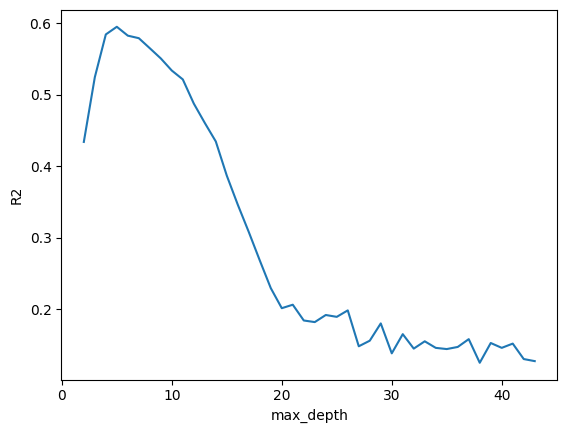

In [110]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [111]:
scores.sort_values(by='Test Score', ascending=False).head()

,Test Score,Train Score
5,0.594709,0.603933
4,0.584005,0.582625
6,0.582307,0.615153
7,0.578772,0.626841
8,0.564725,0.643849


* The depth that gives us the highest R2 score is 5

In [112]:
# set max depth to 5
dec_tree_tuned = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_tuned.fit(X_train_processed, y_train)
dt_tuned_train_score = dec_tree_tuned.score(X_train_processed, y_train)
dt_tuned_test_score = dec_tree_tuned.score(X_test_processed, y_test)
print(f'Decision Tree Tuned Train Score: {dt_tuned_train_score}')
print(f'Decision Tree Tuned Test Score: {dt_tuned_test_score}')

Decision Tree Tuned Train Score: 0.603933236086491
Decision Tree Tuned Test Score: 0.5947092601209935


#### Metrics

In [113]:
## display model performance metrics using a function
dt_tuned_train_predict = dec_tree_tuned.predict(X_train_processed)
dt_tuned_test_predict = dec_tree_tuned.predict(X_test_processed)

eval_regression(y_train, dt_tuned_train_predict, name='Decision Tree Train Tuned')
eval_regression(y_test,dt_tuned_test_predict, name='Decision Tree Test Tuned')

Decision Tree Train Tuned Scores
MAE: 762.6399 
MSE: 1,172,142.0438 
RMSE: 1,082.6551 
R2: 0.6039

Decision Tree Test Tuned Scores
MAE: 738.3556 
MSE: 1,118,187.9463 
RMSE: 1,057.4441 
R2: 0.5947



## Comparing Models

#### Metrics

In [114]:
# Compare linear regression model vs decision trees model
eval_regression(y_test, lin_reg_test_preds, name='Linear Regression Test ')

eval_regression(y_test,dt_tuned_test_predict, name='Decision Tree Test Tuned')

Linear Regression Test  Scores
MAE: 804.2645 
MSE: 1,194,403.5311 
RMSE: 1,092.8877 
R2: 0.5671

Decision Tree Test Tuned Scores
MAE: 738.3556 
MSE: 1,118,187.9463 
RMSE: 1,057.4441 
R2: 0.5947



#### Percent Error for Models

In [115]:
# linear regression model percent error
mae = mean_absolute_error(y_test, lin_reg_test_preds)
per_error = mae / df['Item_Outlet_Sales'].mean() * 100

print(f'Linear Regression Percentage Error: {per_error:.2f}%')

Linear Regression Percentage Error: 36.87%


In [116]:
# decision tree model percent error
y_pred = dec_tree_tuned.predict(X_test_processed)
mae = mean_absolute_error(y_test, y_pred)
per_error = mae / df['Item_Outlet_Sales'].mean() * 100
print(f'Decision Tree Percentage Error: {per_error:.2f}%')

Decision Tree Percentage Error: 33.85%


## Final Evaluation

*   The Decison Tree is the better model to predict Item Outlet Sales.
*   The mean value for Item Outlet Sales was ₹2,181.29.
*   The MAE for Item Outlet Sales was ₹738.36 which makes the error 33.85%.
*   THE MSE and RMSE are slightly lower for the decision tree model, meaning that the decision tree model may be handling any higher outliers in check.
*   The R2 score of close to 60 percent for the decision tree model also beats out the 55 percent R2 score for the linear regression model. This higher score while not a great way to explain the decision tree model being much better helps its validity.

